In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#datasets
datasets = '/content/drive/MyDrive/ia901/projeto_final/dataset/'
train = datasets + 'train/'
test = datasets + 'test/'
val = datasets + 'val/'

In [6]:
glob(os.path.join(datasets,train,'*'))

['/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00055373',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00056452',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00043704',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00043677',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00028185',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00059428',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00055738',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00051539',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00035072',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00055763',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00043520',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00059346',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00054019',
 '/content/drive/MyDrive/ia901/projeto_final/dataset/train/A00058667',
 '/con

In [51]:
all_images=glob('/content/drive/MyDrive/ia901/projeto_final/dataset/sub-A00028185_ses-NFB3_T1w.nii.gz')
print(len(all_images),' matching files found:',all_images)

1  matching files found: ['/content/drive/MyDrive/ia901/projeto_final/dataset/sub-A00028185_ses-NFB3_T1w.nii.gz']


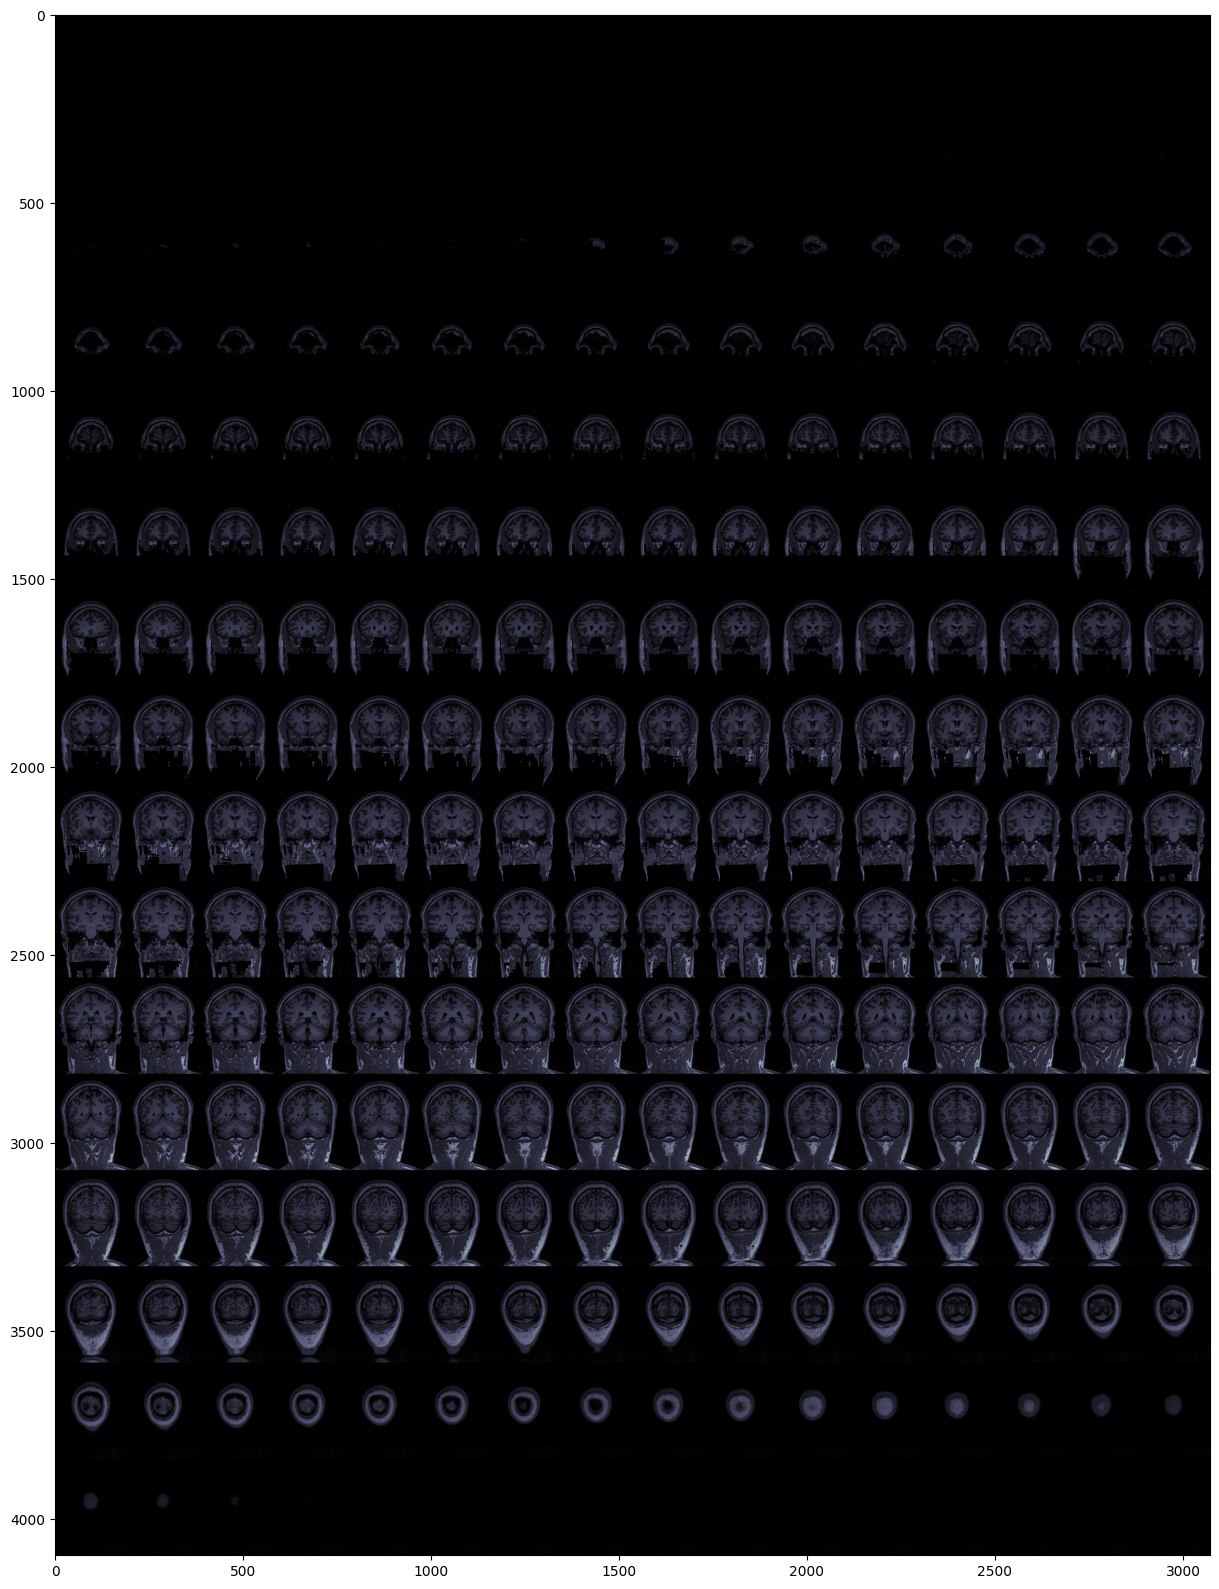

In [52]:
from skimage.util import montage as montage2d
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage2d(test_image), cmap ='bone')
fig.savefig('ct_scan.png')

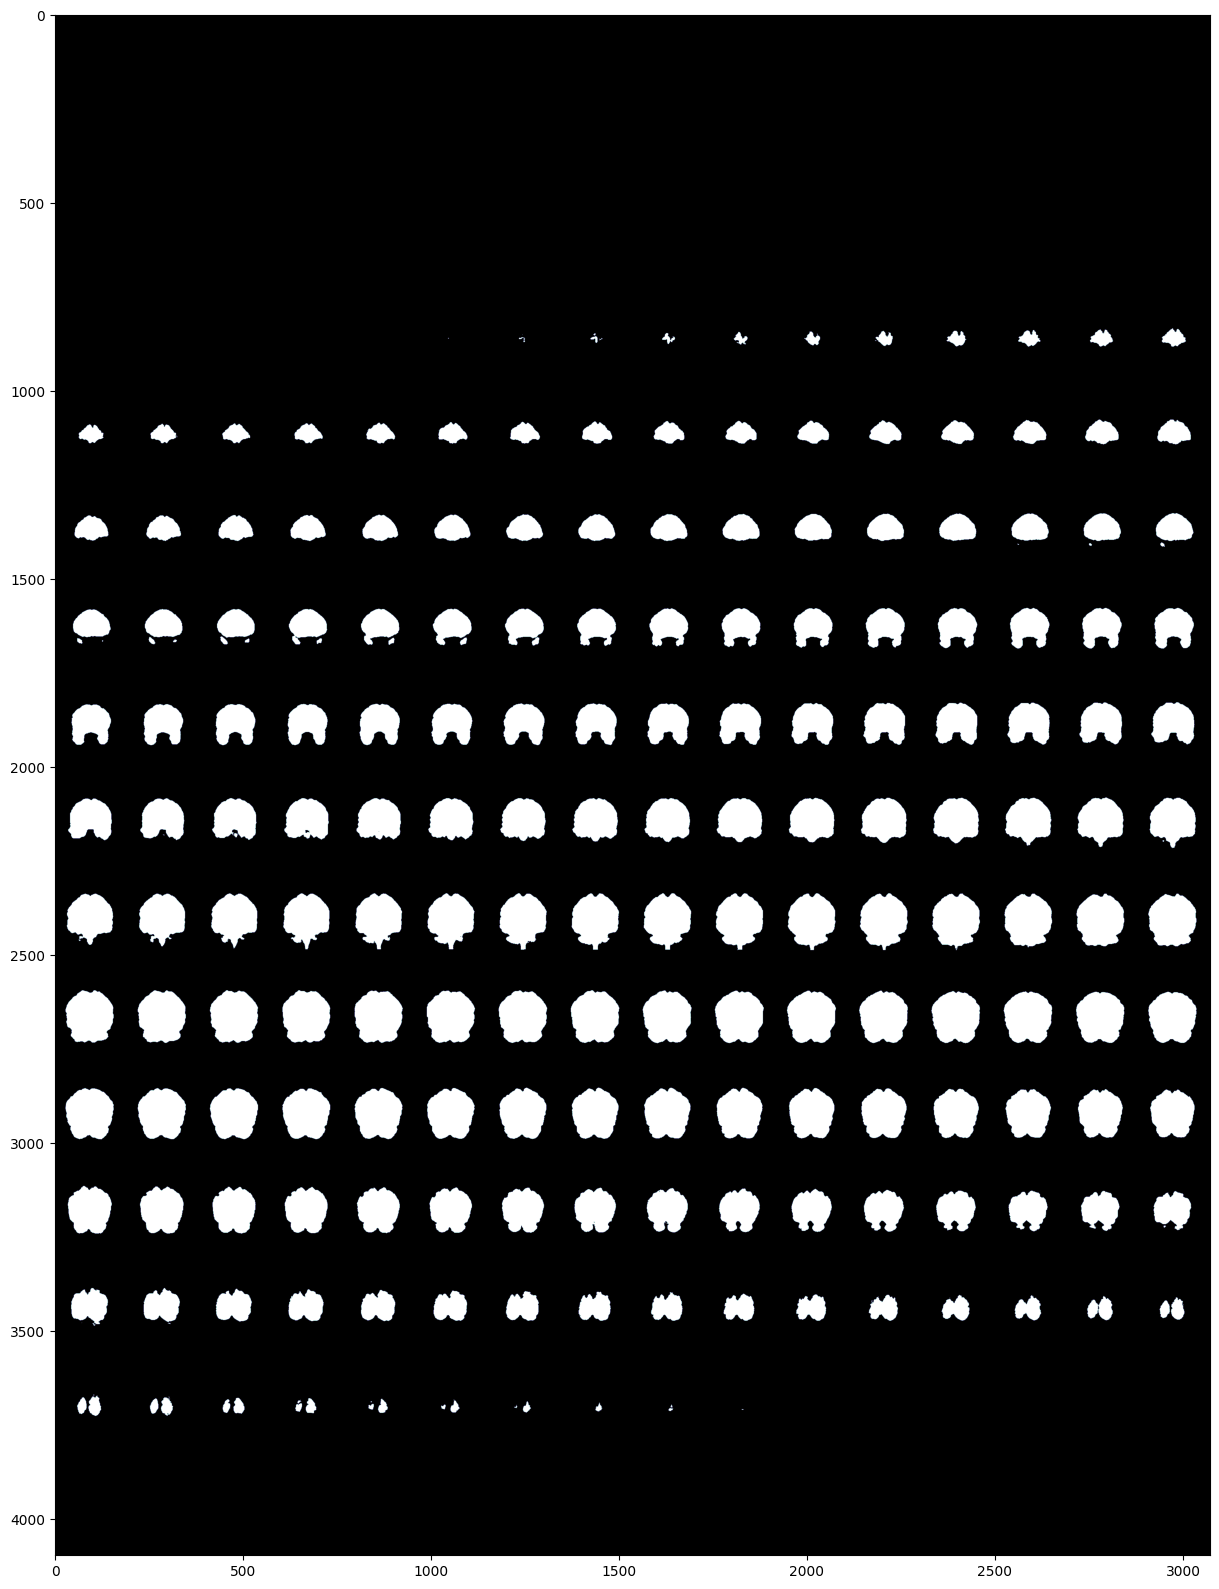

In [53]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 20))
ax1.imshow(montage2d(test_mask), cmap ='bone')
fig.savefig('mask.png')

<ipython-input-46-339435051707>:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_image=nib.load(all_images[0]).get_data()
<ipython-input-46-339435051707>:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_mask=nib.load(all_masks[0]).get_data()


Text(0.5, 1.0, 'Mask')

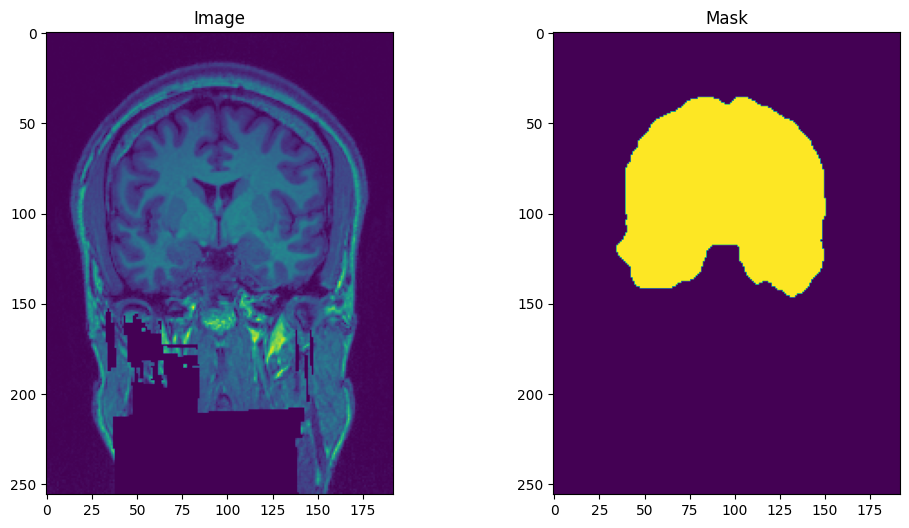

In [46]:
%matplotlib inline
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')

test_image=nib.load(all_images[0]).get_data()
test_mask=nib.load(all_masks[0]).get_data()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[test_image.shape[0]//2])
ax1.set_title('Image')
ax2.imshow(test_mask[test_image.shape[0]//2])
ax2.set_title('Mask')